In [1]:
# -*- encoding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import sympy as sym
import mpmath as mpm
from tqdm import tqdm
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False
mpm.mp.dps = 12
mpm.mp.pretty = True

a = 0.1 # m
T0 = 250+273.15 # K
Tw1 = 100+273.15 # K
Tw2 = 150+273.15 # K
cr = 790 # J/(Kg*K)
kr = 2.2 # W/(m*K)
rhor = 2700 # Kg/m^3
Tw = Tw1
alpha = kr/rhor/cr #m^2/s
T1 = Tw-T0

"""
Tr_r_s(r,s)是要进行拉普拉斯逆变换的函数，逆变换之后加上T0就是最终结果
"""
r1 = 10*a

def Tr_r_s(p):
    r = r1
    y = T1*mpm.besselk(0,mpm.sqrt(p/alpha)*r)/mpm.besselk(0,mpm.sqrt(p/alpha)*a)/p
    return y
    

t = np.array([10,3600,3600*24,3600*24*30]) # s,分别是是10s，1小时，1天，1个月
R = mpm.linspace(a,40*a,2000)

r_all = [ ]
for j in range(len(t)):
    tem = []
    print('It is running the result of %dth model, total %d models'%(j+1,len(t)))
    for i in tqdm(range(len(R))):
        r1 = R[i]
        tmp = mpm.invertlaplace(Tr_r_s,t[j],method='talbot')
        tem.append(tmp)
    r_all.append(tem)
    

# 到这里数值逆拉普拉斯变换的数据已经准备好了

  1%|▍                                                                               | 12/2000 [00:00<00:38, 52.17it/s]

It is running the result of 1th model, total 4 models


  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]

It is running the result of 2th model, total 4 models


  0%|                                                                                 | 1/2000 [00:00<05:17,  6.29it/s]

It is running the result of 3th model, total 4 models


  0%|                                                                                 | 2/2000 [00:00<02:37, 12.66it/s]

It is running the result of 4th model, total 4 models


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [05:04<00:00,  6.58it/s]


<IPython.core.display.Javascript object>


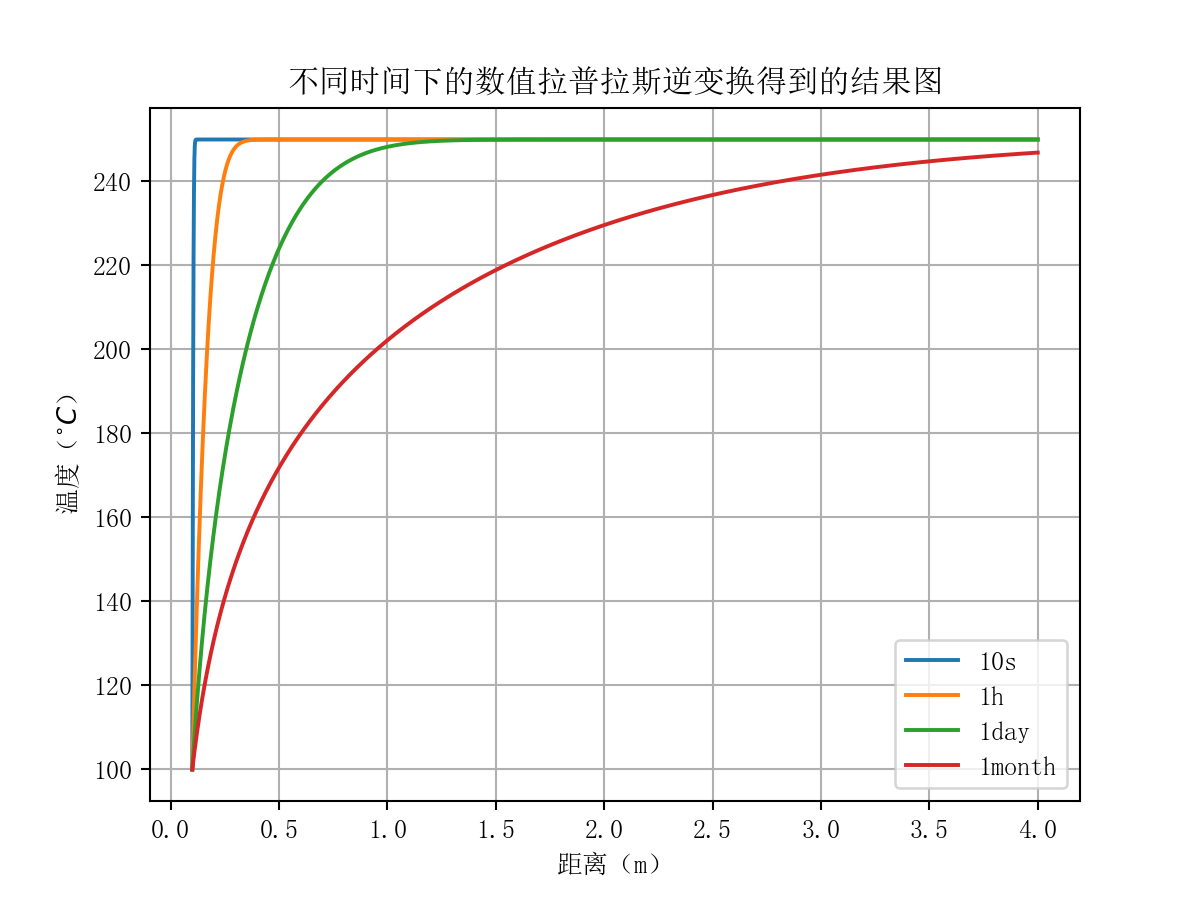

In [2]:
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=150)
ax.plot(R,[sym.sympify(a)+T0-273.15 for a in r_all[0]],label='10s')
ax.plot(R,[sym.sympify(a)+T0-273.15 for a in r_all[1]],label='1h')
ax.plot(R,[sym.sympify(a)+T0-273.15 for a in r_all[2]],label='1day')
ax.plot(R,[sym.sympify(a)+T0-273.15 for a in r_all[3]],label='1month')
ax.set_title('不同时间下的数值拉普拉斯逆变换得到的结果图')
ax.set_xlabel('距离（m）')
ax.set_ylabel(r'温度（$^{\circ}C$）')
# ax.set_xscale('log')
ax.grid()
ax.legend()
fig.savefig('数值逆变换')

<IPython.core.display.Javascript object>


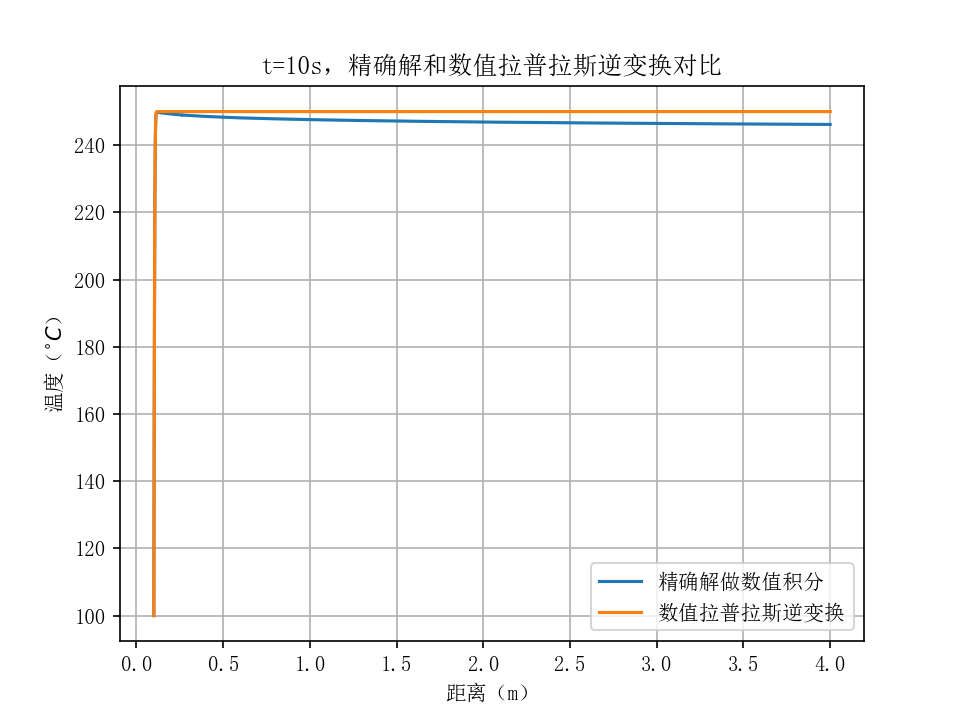

In [3]:
R_m = np.loadtxt('D:/Code/Mathematica/r_t0.txt')
T_m = np.loadtxt('D:/Code/Mathematica/T_t0.txt')
####### R_m和T_m是有mathematica生成的数据，R是距离，T是精确解做数值积分
####### r_t0.txt的t0表示时间取10s
T_m1 = Tw+T1*T_m-273.15
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=120)
ax.plot(R_m,T_m1,label='精确解做数值积分')
ax.plot(R,[sym.sympify(a)+T0-273.15 for a in r_all[0]],label='数值拉普拉斯逆变换')
ax.set_title('t=10s，精确解和数值拉普拉斯逆变换对比')
ax.set_xlabel('距离（m）')
ax.set_ylabel(r'温度（$^{\circ}C$）')
ax.grid()
ax.legend()
fig.savefig('10s对比图')

<IPython.core.display.Javascript object>


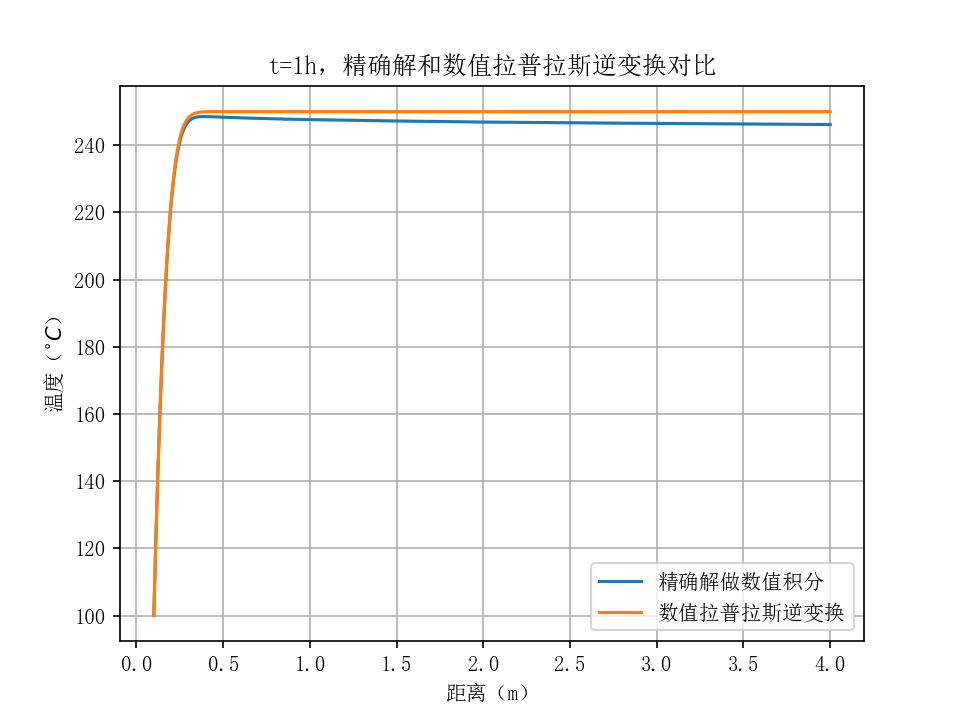

In [4]:
R_m = np.loadtxt('D:/Code/Mathematica/r_t1.txt')
T_m = np.loadtxt('D:/Code/Mathematica/T_t1.txt')
####### R_m和T_m是有mathematica生成的数据，R是距离，T是精确解做数值积分
####### r_t0.txt的t1表示时间取1h
T_m1 = Tw+T1*T_m-273.15
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=120)
ax.plot(R_m,T_m1,label='精确解做数值积分')
ax.plot(R,[sym.sympify(a)+T0-273.15 for a in r_all[1]],label='数值拉普拉斯逆变换')
ax.set_title('t=1h，精确解和数值拉普拉斯逆变换对比')
ax.set_xlabel('距离（m）')
ax.set_ylabel(r'温度（$^{\circ}C$）')
ax.grid()
ax.legend()
fig.savefig('1h对比图')

<IPython.core.display.Javascript object>


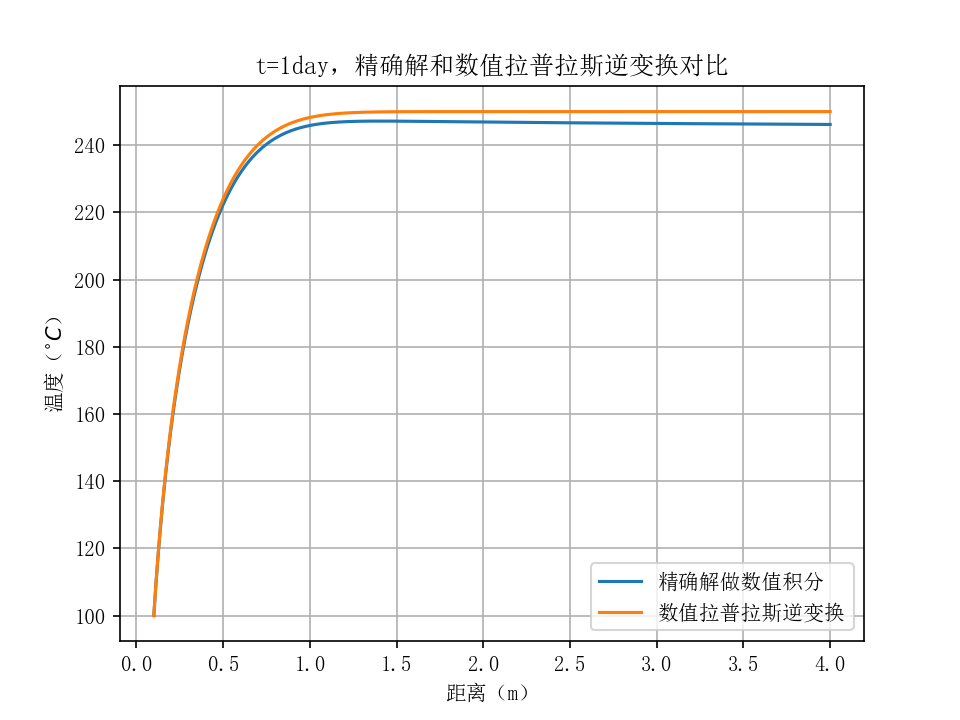

In [5]:
R_m = np.loadtxt('D:/Code/Mathematica/r_t2.txt')
T_m = np.loadtxt('D:/Code/Mathematica/T_t2.txt')
####### R_m和T_m是有mathematica生成的数据，R是距离，T是精确解做数值积分
####### r_t0.txt的t2表示时间取1day
T_m1 = Tw+T1*T_m-273.15
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=120)
ax.plot(R_m,T_m1,label='精确解做数值积分')
ax.plot(R,[sym.sympify(a)+T0-273.15 for a in r_all[2]],label='数值拉普拉斯逆变换')
ax.set_title('t=1day，精确解和数值拉普拉斯逆变换对比')
ax.set_xlabel('距离（m）')
ax.set_ylabel(r'温度（$^{\circ}C$）')
ax.grid()
ax.legend()
fig.savefig('1day对比图')

<IPython.core.display.Javascript object>


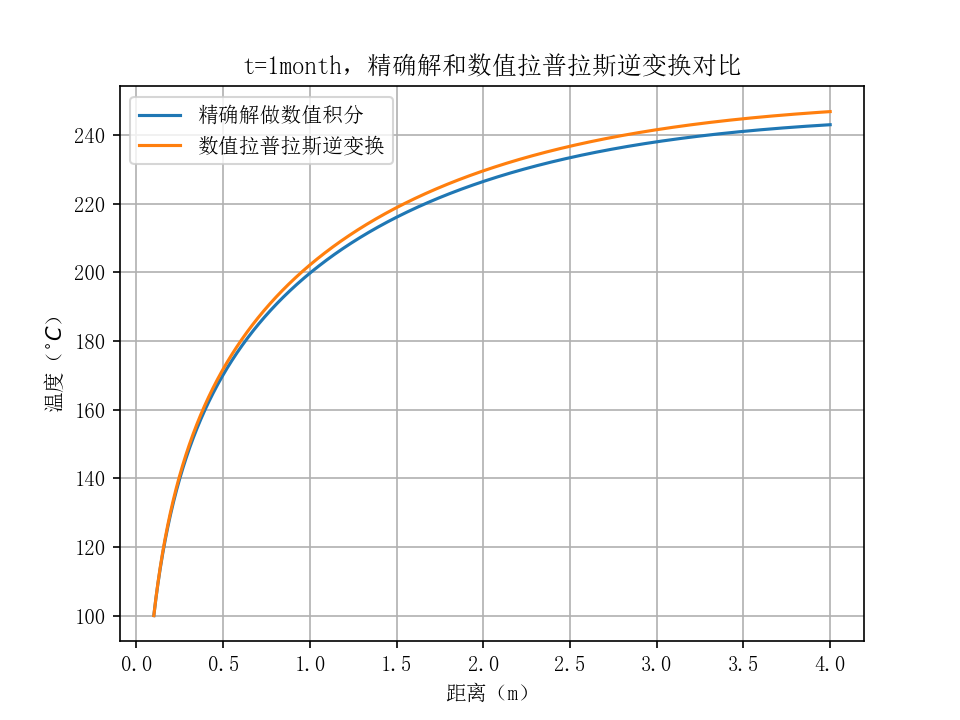

In [6]:
R_m = np.loadtxt('D:/Code/Mathematica/r_t3.txt')
T_m = np.loadtxt('D:/Code/Mathematica/T_t3.txt')
####### R_m和T_m是有mathematica生成的数据，R是距离，T是精确解做数值积分
####### r_t0.txt的t3表示时间取1month
T_m1 = Tw+T1*T_m-273.15
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=120)
ax.plot(R_m,T_m1,label='精确解做数值积分')
ax.plot(R,[sym.sympify(a)+T0-273.15 for a in r_all[3]],label='数值拉普拉斯逆变换')
ax.set_title('t=1month，精确解和数值拉普拉斯逆变换对比')
ax.set_xlabel('距离（m）')
ax.set_ylabel(r'温度（$^{\circ}C$）')
ax.grid()
ax.legend()
fig.savefig('1month对比图')

<IPython.core.display.Javascript object>


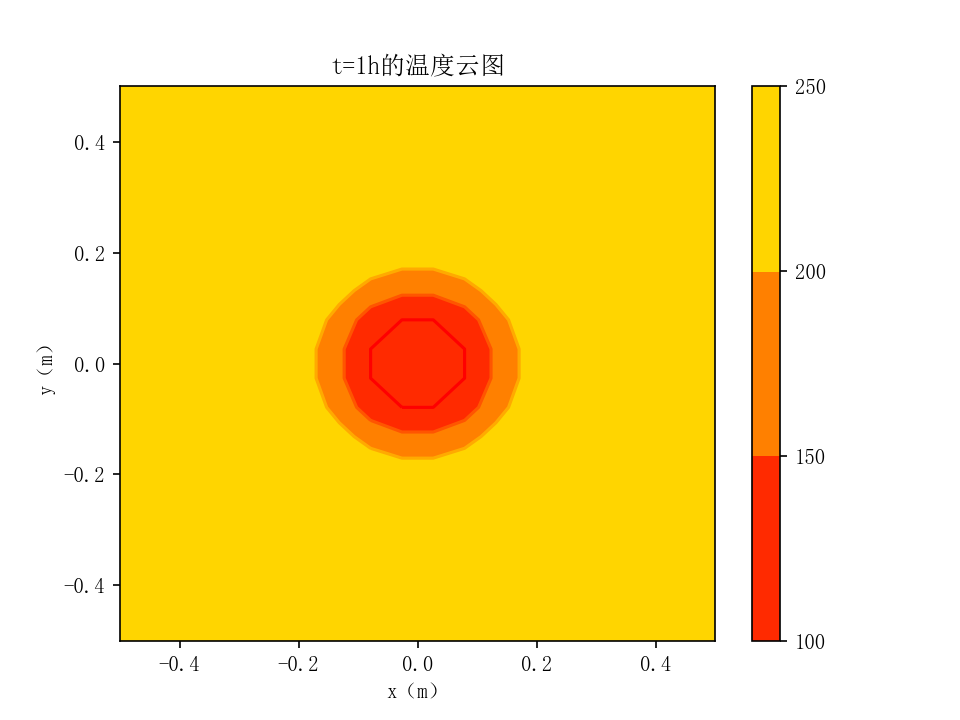

In [13]:
########下面是画温度云图

x = mpm.linspace(-0.5,0.5,20)
y = mpm.linspace(-0.5,0.5,20)
X,Y = np.meshgrid(x,y)
R_2D = (X**2+Y**2)**0.5

T_2D = []
for i in tqdm(range(len(R_2D.ravel()))):
    r1 = R_2D.ravel()[i]
    if r1 > 0.1:
        tmp = mpm.invertlaplace(Tr_r_s,t[1],method='talbot')
        T_2D.append(tmp)
    else:
        T_2D.append(T1)


T_2D1 = [sym.sympify(a)+T0-273.15 for a in T_2D]
T_2D_1 = np.array(T_2D1)
T_2D_2 = np.reshape(T_2D_1,(20,20))
fig, ax = plt.subplots(dpi=120)
contour1 = ax.contourf(X,Y,T_2D_2,levels=np.linspace(100,250,4),cmap='autumn')#,colors=('r', 'g', 'b'),extend='both')
ax.contour(X,Y,T_2D_2,levels=np.linspace(100,250,4),cmap='autumn')
ax.set_xlabel('x（m）')
ax.set_ylabel('y（m）')
ax.set_title('t=1h的温度云图')
cbar = fig.colorbar(contour1)
fig.savefig('1h温度云图')